In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("international-airline-passengers.csv",usecols=[1], engine='python',skipfooter=3)


In [3]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [4]:
dataset = dataframe.values.astype('float32')

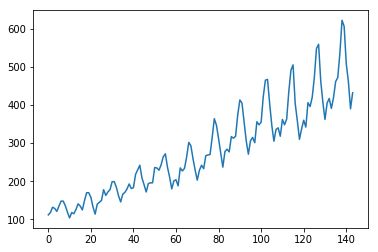

In [5]:
plt.plot(dataset)
plt.show()

In [7]:
#splitting data into training and test sets

train_size = int(len(dataset)*0.67)
test_size = int(len(dataset)-train_size)

train, test = dataset[:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [8]:
def creat_dataset(data,look_back = 1):  #lookback > 1 : window method (more accuracy)
    data_X, data_Y = [], []
    for i in range(len(data)-look_back):
        data_X.append(data[i:i+look_back,0])
        data_Y.append(data[i+look_back,0])
    return np.array(data_X),np.array(data_Y)
    
train_X, train_Y = creat_dataset(train) 
test_X, test_Y = creat_dataset(test)

In [9]:
train_X[0:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [10]:
train_Y[0:5]

array([118., 132., 129., 121., 135.], dtype=float32)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(Dense(8,input_dim = 1, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(train_X,train_Y,epochs = 200,batch_size = 2, verbose = 2)

Epoch 1/200
 - 4s - loss: 70494.2189
Epoch 2/200
 - 0s - loss: 57154.1826
Epoch 3/200
 - 0s - loss: 45708.0609
Epoch 4/200
 - 0s - loss: 36278.6026
Epoch 5/200
 - 0s - loss: 28221.8880
Epoch 6/200
 - 0s - loss: 21689.4308
Epoch 7/200
 - 0s - loss: 16285.6717
Epoch 8/200
 - 0s - loss: 12023.2854
Epoch 9/200
 - 0s - loss: 8710.7057
Epoch 10/200
 - 0s - loss: 6208.3922
Epoch 11/200
 - 0s - loss: 4351.4228
Epoch 12/200
 - 0s - loss: 3034.9865
Epoch 13/200
 - 0s - loss: 2124.2398
Epoch 14/200
 - 0s - loss: 1508.9970
Epoch 15/200
 - 0s - loss: 1114.6457
Epoch 16/200
 - 0s - loss: 870.2161
Epoch 17/200
 - 0s - loss: 720.8381
Epoch 18/200
 - 0s - loss: 643.8536
Epoch 19/200
 - 0s - loss: 596.4279
Epoch 20/200
 - 0s - loss: 566.9636
Epoch 21/200
 - 0s - loss: 553.5060
Epoch 22/200
 - 0s - loss: 548.2247
Epoch 23/200
 - 0s - loss: 544.4857
Epoch 24/200
 - 0s - loss: 541.5178
Epoch 25/200
 - 0s - loss: 543.7517
Epoch 26/200
 - 0s - loss: 543.0257
Epoch 27/200
 - 0s - loss: 542.5156
Epoch 28/200
 

In [13]:
import math
train_scores = model.evaluate(train_X,train_Y,verbose=0)
print("train scores : %.2f MSE, %.2f RMSE"%(train_scores,math.sqrt(train_scores)))
test_scores = model.evaluate(test_X,test_Y,verbose=0)
print("test scores : %.2f MSE, %.2f RMSE"%(test_scores,math.sqrt(test_scores)))

train scores : 537.84 MSE, 23.19 RMSE
test scores : 2340.36 MSE, 48.38 RMSE


In [14]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

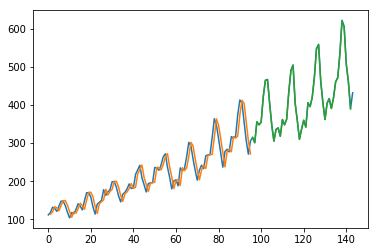

In [17]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predict)+1, :] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+1:len(dataset)-1, :] = test_predict

plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()